In [1]:
import pandas as pd
# Time Series Forecasting - Multivariate Time Series Models for Stock Market Prediction
# A tutorial for this file is available at www.relataly.com

import math # Mathematical functions 
import numpy as np # Fundamental package for scientific computing with Python
import pandas as pd # Additional functions for analysing and manipulating data
from datetime import date, timedelta, datetime # Date Functions
from pandas.plotting import register_matplotlib_converters # This function adds plotting functions for calender dates
import matplotlib.pyplot as plt # Important package for visualization - we use this to plot the market data
import matplotlib.dates as mdates # Formatting dates
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error # Packages for measuring model performance / errors
from tensorflow.keras import Sequential # Deep learning library, used for neural networks
from tensorflow.keras.layers import LSTM, Dense, Dropout # Deep learning classes for recurrent and regular densely-connected layers
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import SimpleRNN
from sklearn.preprocessing import RobustScaler, MinMaxScaler # This Scaler removes the median and scales the data according to the quantile range to normalize the price data 
import seaborn as sns # Visualization
from keras.layers import Dense, Dropout, LSTM, SimpleRNN, GRU
sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})


In [2]:
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, SimpleRNN, GRU
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras import optimizers
from keras import backend as K
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [3]:
# Importing dependencies

import numpy as np
np.random.seed(1)
#from tensorflow import set_random_seed
#set_random_seed(2)
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers.core import Dense
#from keras.layers.recurrent import LSTM
from keras import optimizers
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import datetime as dt
import time
plt.style.use('ggplot')

In [4]:
bist_df = pd.read_csv('Desktop/stock markets/BIST 30 Historical Data.csv', parse_dates=["Date"], index_col="Date")
krdmd_df = pd.read_csv('Desktop/stock markets/KRDMD.IS.csv', parse_dates=["Date"], index_col="Date")
erely_df = pd.read_csv('Desktop/stock markets/ERELY.csv', parse_dates=["Date"], index_col="Date")
euro_df = pd.read_csv('Desktop/stock markets/EUR_TRY Historical Data.csv', parse_dates=["Date"], index_col="Date")
dolar_df = pd.read_csv('Desktop/stock markets/USD_TRY Historical Data.csv', parse_dates=["Date"], index_col="Date")
fed_df = pd.read_csv('Desktop/stock markets/Federal Funds Composite Interest Rate Historical Data.csv', parse_dates=["Date"], index_col="Date")
turkfaiz_df = pd.read_csv('Desktop/stock markets/TURKISH LIRA OVERNIGHT REFERENCE RATE Historical Data.csv', parse_dates=["Date"], index_col="Date")


In [5]:
krdmd_df.sort_values(by='Date', ascending=False)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-26,14.50,14.78,14.32,14.65,14.65,102533613
2022-05-25,14.21,14.58,14.15,14.53,14.53,80955292
2022-05-24,14.30,14.38,14.06,14.18,14.18,92464115
2022-05-23,14.32,14.44,13.86,14.22,14.22,86151858
2022-05-20,14.38,14.45,13.96,13.98,13.98,68488296
...,...,...,...,...,...,...
2020-06-02,2.62,2.63,2.56,2.58,2.58,118405288
2020-06-01,2.54,2.62,2.53,2.61,2.61,147170375
2020-05-29,2.53,2.57,2.49,2.52,2.52,78052384


In [6]:
bist_df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-05-26,"2,699.13","2,690.37","2,704.41","2,690.37",171.56M,0.33%
2022-05-25,"2,690.37","2,648.15","2,697.83","2,644.06",1.95B,2.20%
2022-05-24,"2,632.50","2,658.18","2,666.07","2,632.29",1.54B,-0.46%
2022-05-23,"2,644.67","2,655.28","2,662.05","2,602.03",2.06B,0.49%
2022-05-20,"2,631.81","2,649.13","2,675.02","2,631.81",1.99B,-0.87%


In [7]:
import numpy as np
import string
high_prices = bist_df.loc[:,'High'].str.replace(',', '', regex=False)
low_prices = bist_df.loc[:,'Low'].str.replace(',', '', regex=False)
mid_prices = (high_prices.astype(float) + low_prices.astype(float))/2.0
print(mid_prices)

high_prices1 = erely_df.loc[:,'High']
low_prices1 = erely_df.loc[:,'Low']
mid_prices1 = (high_prices1.astype(float) + low_prices1.astype(float))/2.0
print(mid_prices1)

high_prices2 = euro_df.loc[:,'High']
low_prices2 = euro_df.loc[:,'Low']
mid_prices2 = (high_prices2.astype(float) + low_prices2.astype(float))/2.0
print(mid_prices2)

high_prices3 = dolar_df.loc[:,'High']
low_prices3 = dolar_df.loc[:,'Low']
mid_prices3 = (high_prices3.astype(float) + low_prices3.astype(float))/2.0
print(mid_prices3)

high_prices4 = fed_df.loc[:,'High']
low_prices4 = fed_df.loc[:,'Low']
mid_prices4 = (high_prices4.astype(float) + low_prices4.astype(float))/2.0
print(mid_prices4)

high_prices5 = turkfaiz_df.loc[:,'High']
low_prices5 = turkfaiz_df.loc[:,'Low']
mid_prices5 = (high_prices5.astype(float) + low_prices5.astype(float))/2.0
print(mid_prices5)

Date
2022-05-26    2697.390
2022-05-25    2670.945
2022-05-24    2649.180
2022-05-23    2632.040
2022-05-20    2653.415
                ...   
2020-06-02    1256.505
2020-06-01    1245.305
2020-05-29    1223.305
2020-05-28    1225.210
2020-05-27    1213.300
Length: 502, dtype: float64
Date
2020-05-26     7.59
2020-05-27     7.59
2020-05-28     7.59
2020-05-29     7.59
2020-06-01     7.59
              ...  
2022-05-20    10.10
2022-05-23    10.10
2022-05-24    10.10
2022-05-25    10.10
2022-05-26    10.10
Length: 507, dtype: float64
Date
2022-05-26    17.49045
2022-05-25    17.33780
2022-05-24    17.14985
2022-05-23    16.88285
2022-05-20    16.85580
                ...   
2020-06-01     7.58165
2020-05-29     7.58105
2020-05-28     7.50470
2020-05-27     7.42575
2020-05-26     7.39870
Length: 523, dtype: float64
Date
2022-05-26    16.40295
2022-05-25    16.21325
2022-05-24    16.02675
2022-05-23    15.84675
2022-05-20    15.93250
                ...   
2020-06-01     6.80990
2020-05-2

In [8]:
krdmd_df['BIST'] = mid_prices
krdmd_df['ERELY'] = mid_prices1
krdmd_df['EURO'] = mid_prices2
krdmd_df['USD'] = mid_prices3
krdmd_df['FED'] = mid_prices4
krdmd_df['TCBM'] = mid_prices5

In [9]:
krdmd_df.isna().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
BIST          0
ERELY        15
EURO          0
USD           0
FED          18
TCBM          1
dtype: int64

In [10]:
##Filling Missing Values with Previous Day Value
krdmd_df = krdmd_df.fillna(method='ffill')
krdmd_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
BIST         0
ERELY        0
EURO         0
USD          0
FED          0
TCBM         0
dtype: int64

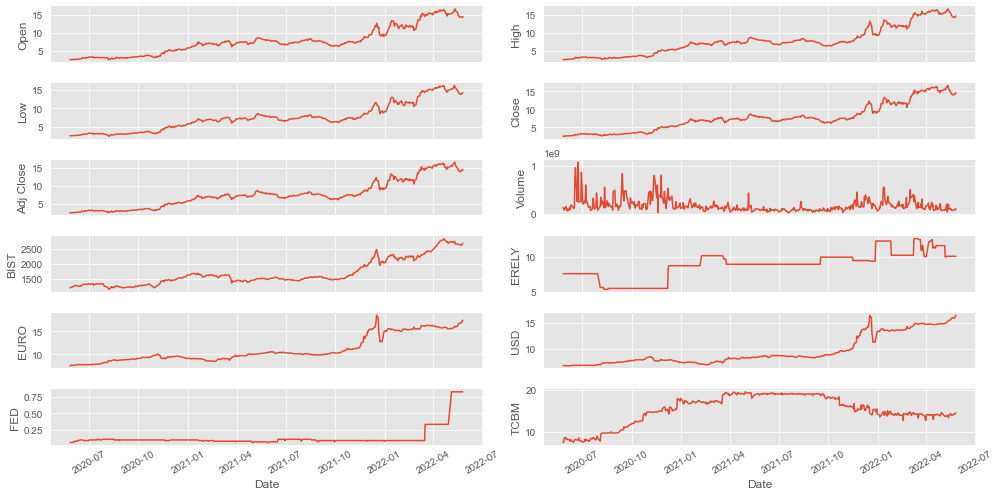

In [11]:
# Plot line charts
df_plot = krdmd_df.copy()

ncols = 2
nrows = int(round(df_plot.shape[1] / ncols, 0))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 7))
for i, ax in enumerate(fig.axes):
        sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
        ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.tight_layout()
plt.show()

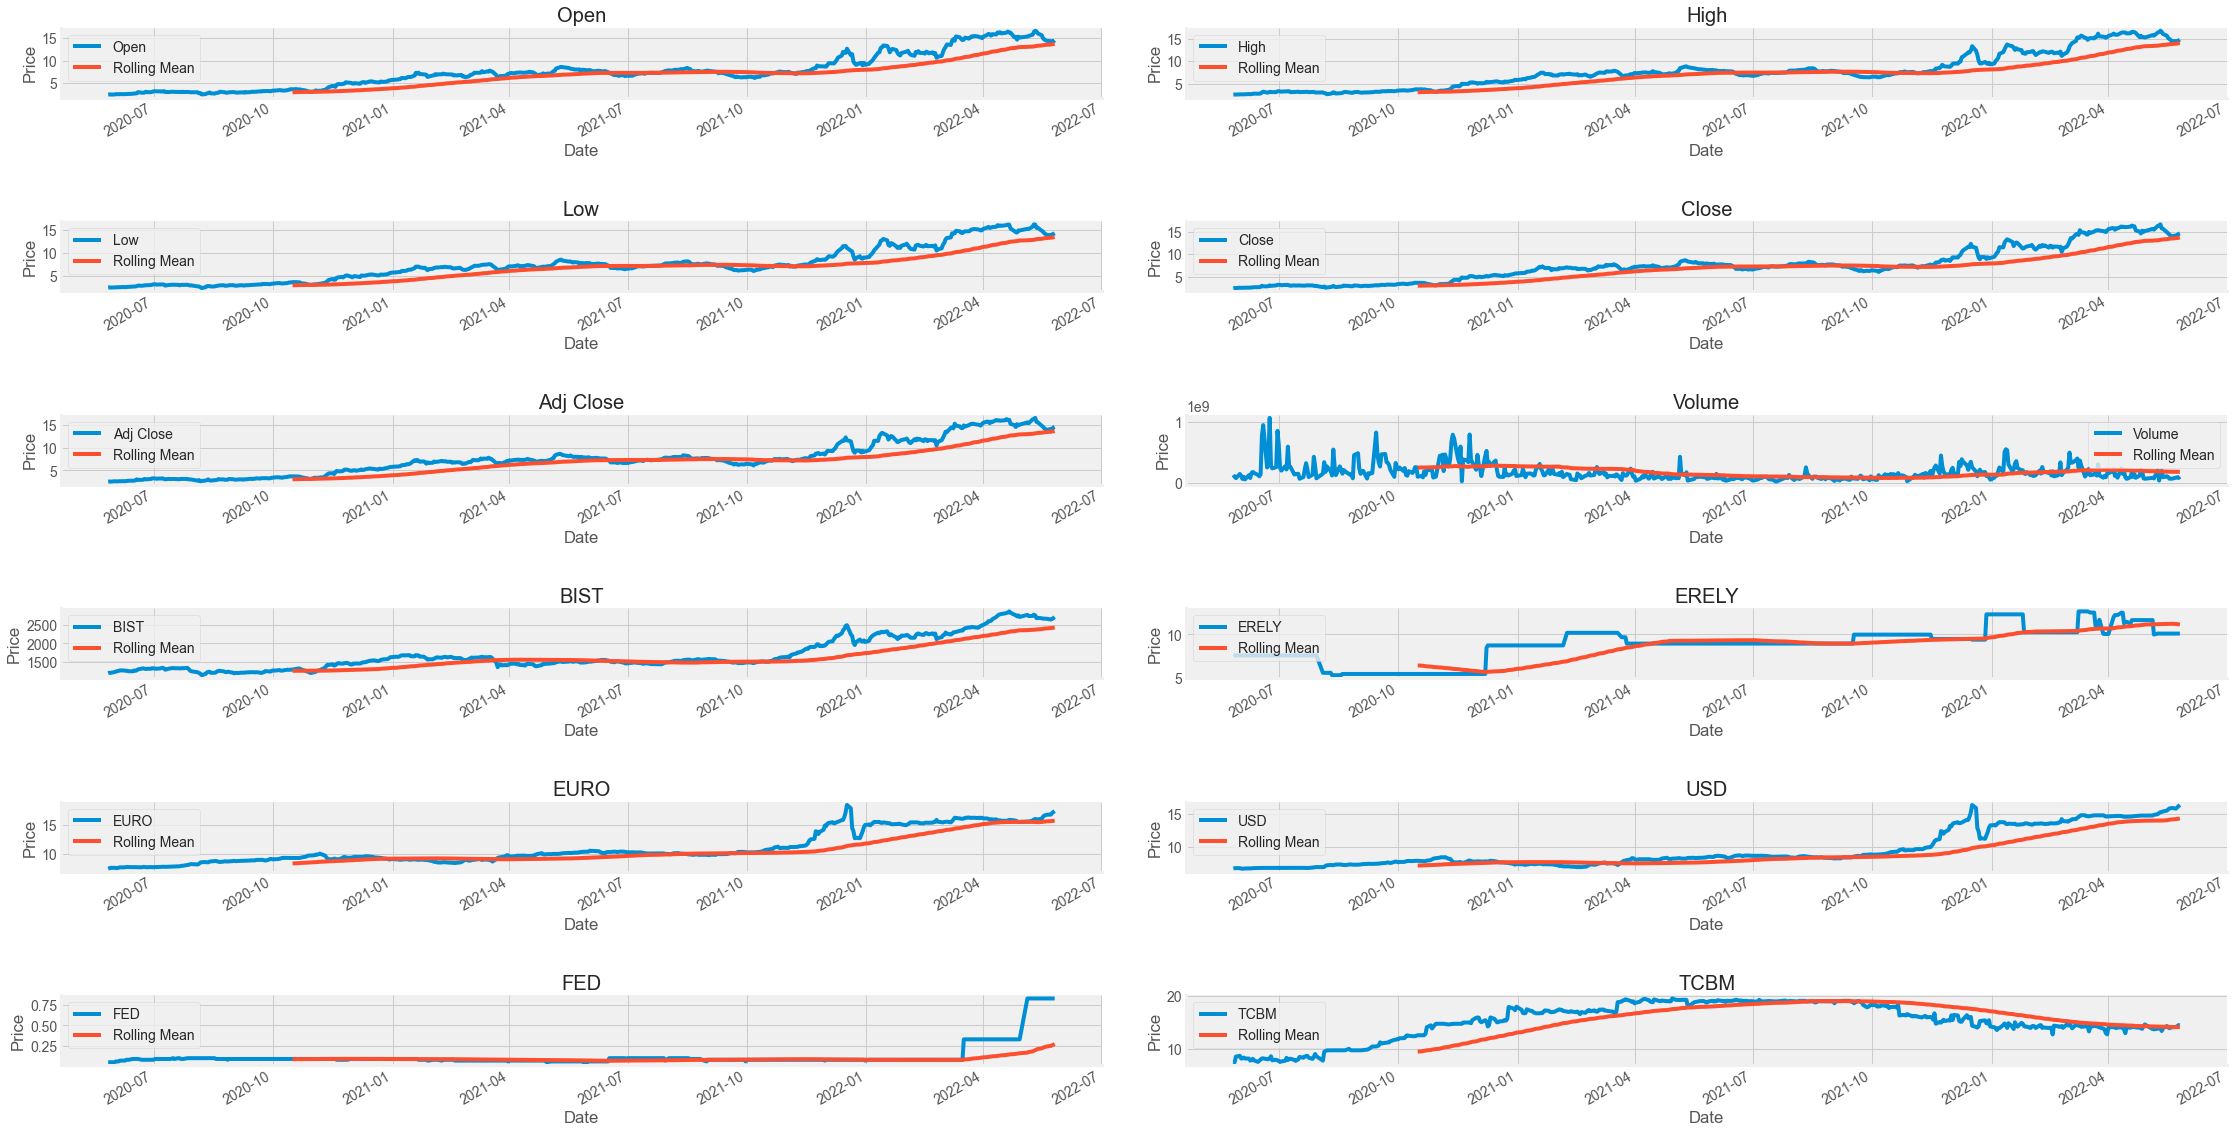

In [12]:
##Line Plots Target & Features
data = krdmd_df
col_names = data.columns

fig = plt.figure(figsize=(32, 32))
plt.style.use('fivethirtyeight')
for i in range(12):
  ax = fig.add_subplot(12,2,i+1)
  ax.plot(data.iloc[:,i],label=col_names[i])
  data.iloc[:,i].rolling(100).mean().plot(label='Rolling Mean')
  ax.set_title(col_names[i])
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  plt.legend()
fig.tight_layout(pad=3.0)
plt.show()

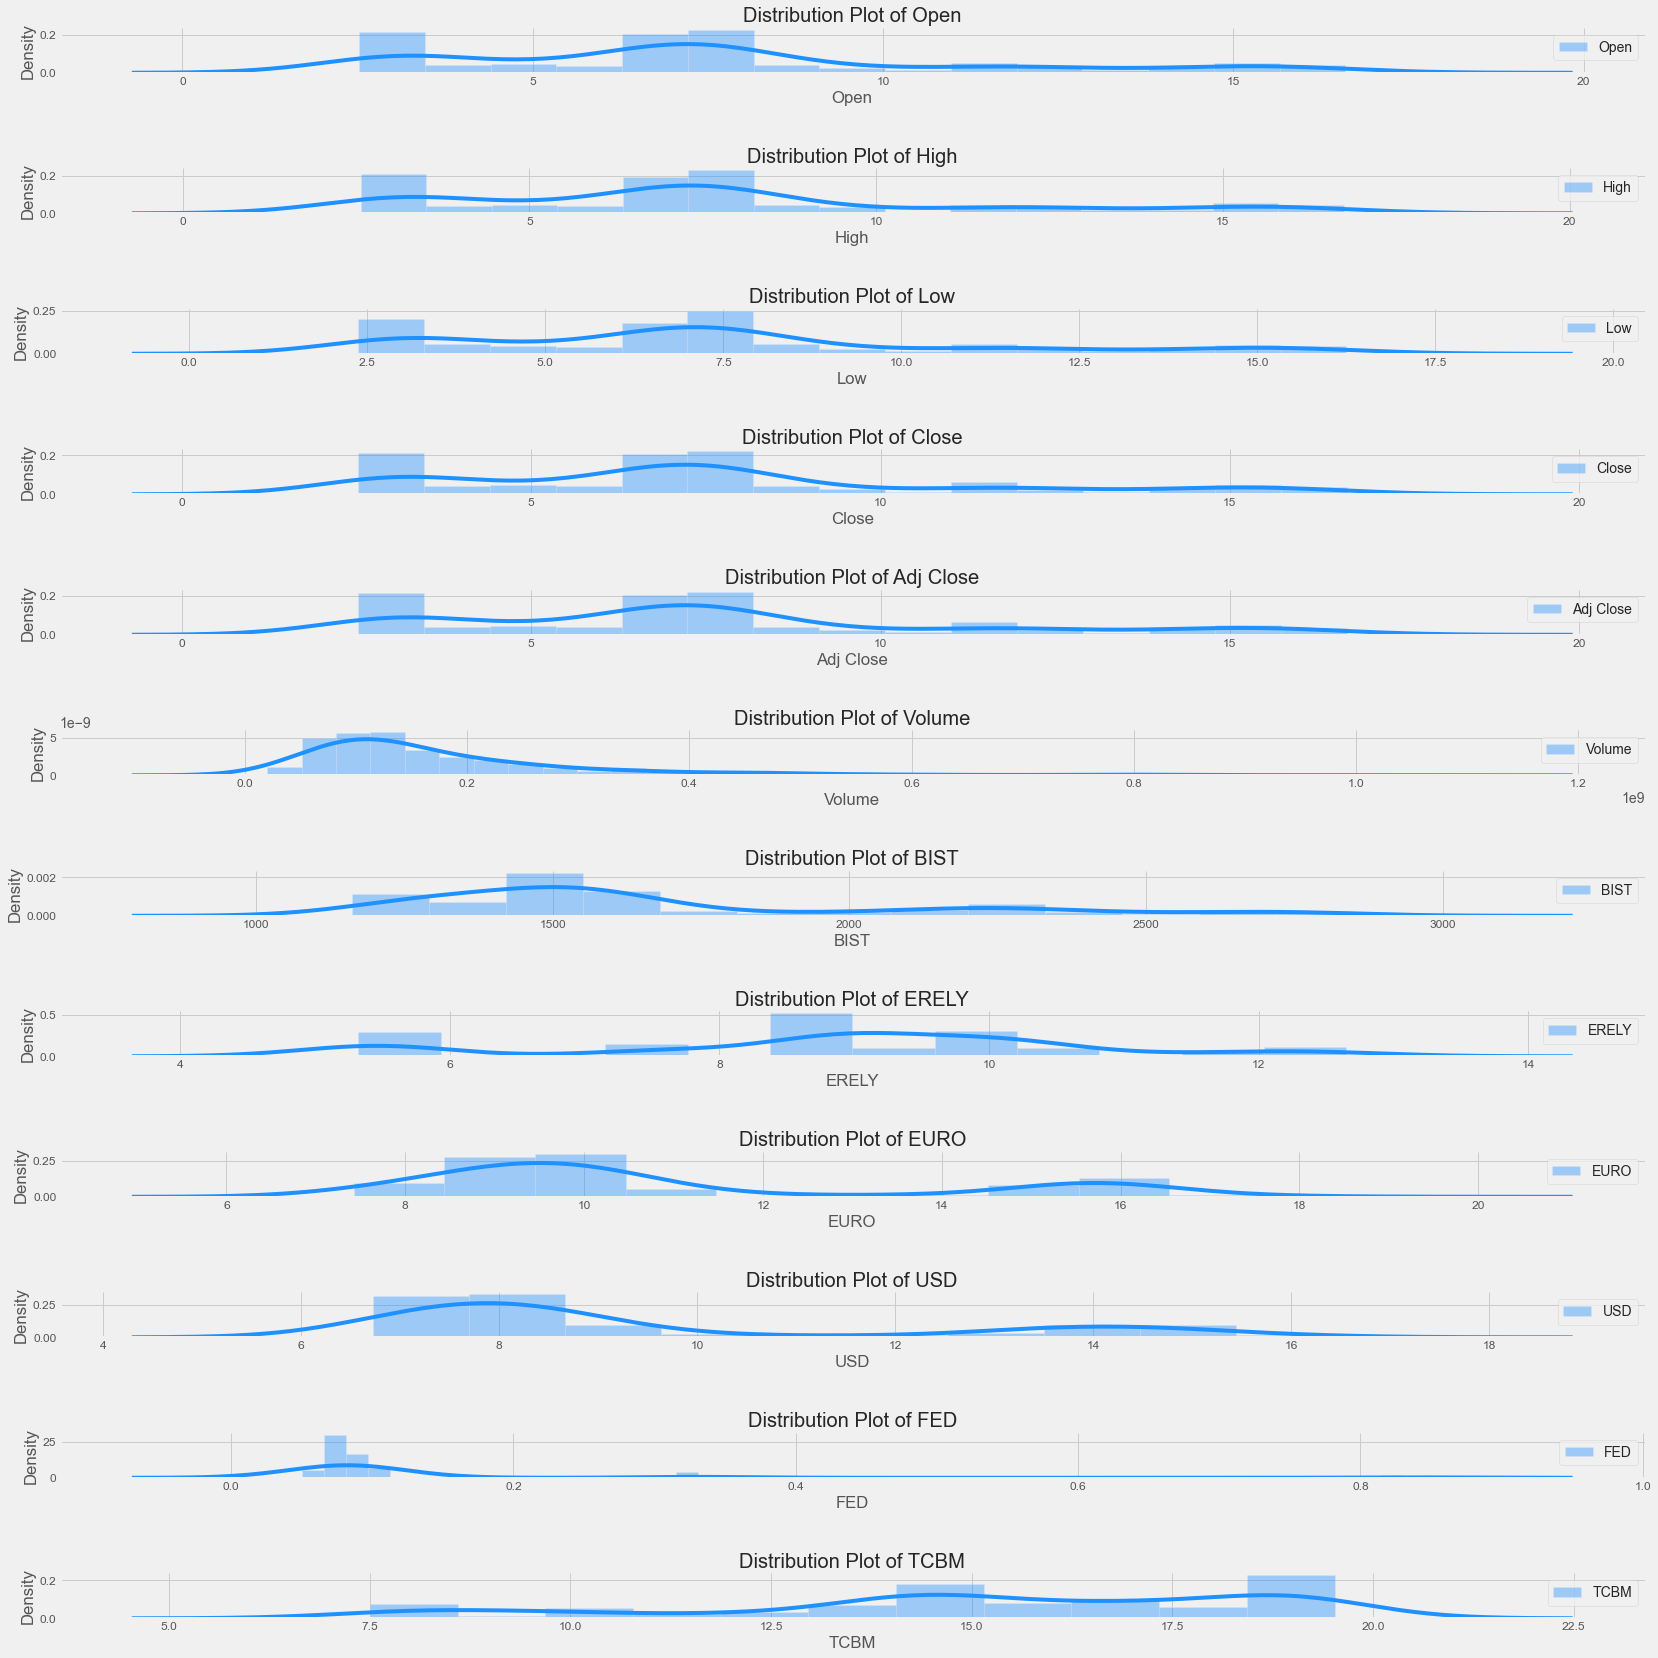

In [13]:
##Checking if Target and Features follow Normal Distribution
data = krdmd_df
fig = plt.figure(figsize=(24, 24))
plt.style.use('fivethirtyeight')
col_names = data.columns
for i in range(12):
  ax = fig.add_subplot(12,1,i+1)
  sns.distplot(data.iloc[:,i],label=col_names[i],color='dodgerblue').set_title("Distribution Plot of {}".format(col_names[i]),axes=ax)
  ax.tick_params(labelsize=12)
  plt.legend()
fig.tight_layout(pad=3.0)
plt.show()

In [14]:
##Scaling Data to Observe Bivariate Analysis 
sc = MinMaxScaler(feature_range=(0,1))
krdmd_df_scaled= sc.fit_transform(krdmd_df)

In [15]:
krdmd_df_scaled

array([[0.00000000e+00, 0.00000000e+00, 9.36599424e-03, ...,
        2.64573504e-03, 0.00000000e+00, 7.48752080e-03],
       [2.13068182e-03, 1.41143260e-03, 1.15273775e-02, ...,
        7.12074783e-03, 0.00000000e+00, 0.00000000e+00],
       [7.10227273e-04, 0.00000000e+00, 8.64553314e-03, ...,
        9.67346876e-03, 0.00000000e+00, 8.90183028e-02],
       ...,
       [8.36647727e-01, 8.33450953e-01, 8.42219020e-01, ...,
        9.61120097e-01, 1.00000000e+00, 5.65723794e-01],
       [8.30255682e-01, 8.47565279e-01, 8.48703170e-01, ...,
        9.80394690e-01, 1.00000000e+00, 5.82362729e-01],
       [8.50852273e-01, 8.61679605e-01, 8.60951009e-01, ...,
        1.00000000e+00, 1.00000000e+00, 5.82362729e-01]])

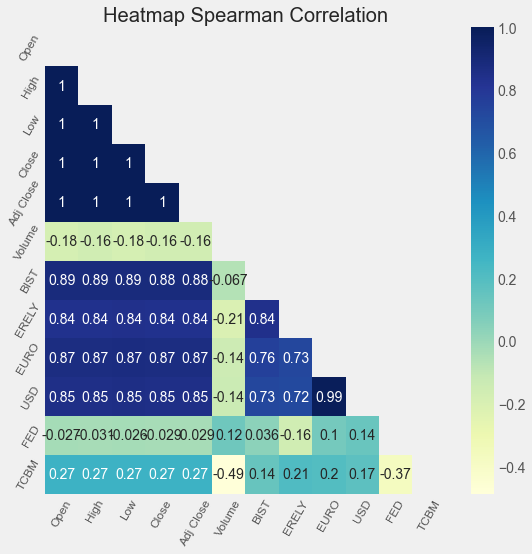

In [16]:
##HeatMap Spearman Correlation
plt.figure(figsize=(8,8))
matrix = np.triu(krdmd_df.corr(method='spearman'))
heat_map = sns.heatmap(krdmd_df.corr(method='spearman'),annot=True,annot_kws={"size":14},cmap= 'YlGnBu',mask=matrix)
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=60)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=60)
plt.tick_params(labelsize=12)
plt.title('Heatmap Spearman Correlation')
plt.style.use('fivethirtyeight')

Text(0.5, 1.0, 'Params')

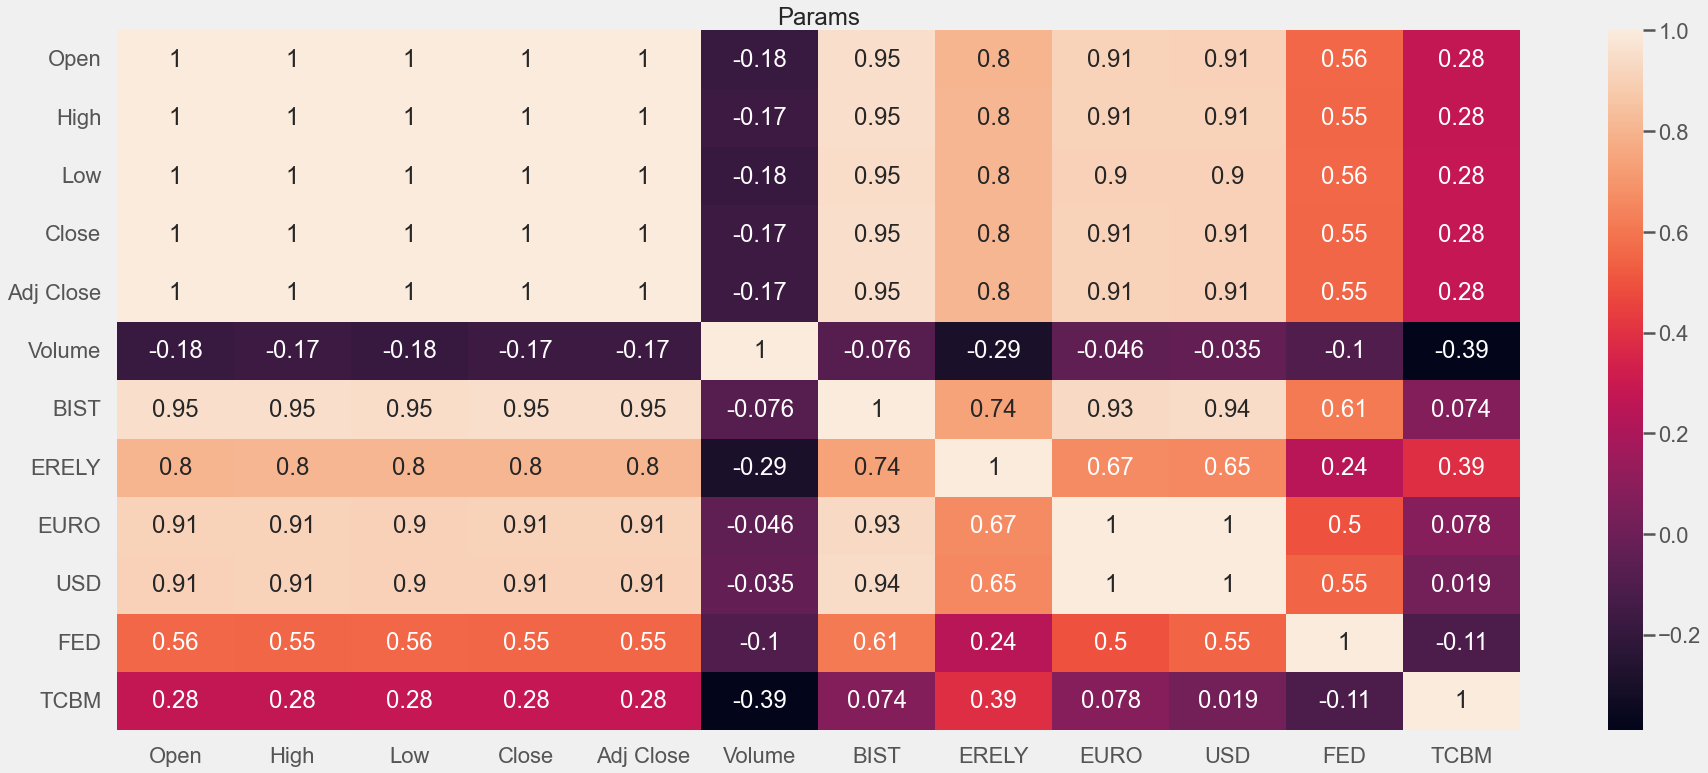

In [17]:
plt.figure(figsize = (28,12))
sns.set_context('poster',font_scale=1)
sns.heatmap(krdmd_df.corr(), annot = True).set_title('Params')

In [18]:
krdmd_df.drop(columns=['Volume'])

,Open,High,Low,Close,Adj Close,BIST,ERELY,EURO,USD,FED,TCBM
Date,,,,,,,,,,,
2020-05-27,2.52,2.57,2.50,2.53,2.53,1213.300,7.59,7.42575,6.75260,0.05,7.59
2020-05-28,2.55,2.59,2.53,2.55,2.55,1225.210,7.59,7.50470,6.79590,0.05,7.50
2020-05-29,2.53,2.57,2.49,2.52,2.52,1223.305,7.59,7.58105,6.82060,0.05,8.57
2020-06-01,2.54,2.62,2.53,2.61,2.61,1245.305,7.59,7.58165,6.80990,0.05,8.71
2020-06-02,2.62,2.63,2.56,2.58,2.58,1256.505,7.59,7.54200,6.75510,0.06,8.20
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-20,14.38,14.45,13.96,13.98,13.98,2653.415,10.10,16.85580,15.93250,0.83,14.09
2022-05-23,14.32,14.44,13.86,14.22,14.22,2632.040,10.10,16.88285,15.84675,0.83,14.15
2022-05-24,14.30,14.38,14.06,14.18,14.18,2649.180,10.10,17.14985,16.02675,0.83,14.30


In [19]:
krdmd_df.corr(method='spearman')

,Open,High,Low,Close,Adj Close,Volume,BIST,ERELY,EURO,USD,FED,TCBM
Open,1.000000,0.998182,0.998310,0.995890,0.995890,-0.182328,0.885616,0.836109,0.871484,0.853716,-0.027098,0.274550
High,0.998182,1.000000,0.998097,0.998122,0.998122,-0.158975,0.886137,0.836332,0.869853,0.851876,-0.031182,0.273859
Low,0.998310,0.998097,1.000000,0.998221,0.998221,-0.183530,0.885154,0.837340,0.872495,0.854883,-0.026206,0.274580
Close,0.995890,0.998122,0.998221,1.000000,1.000000,-0.164967,0.884387,0.836772,0.871849,0.854272,-0.028630,0.273734
Adj Close,0.995890,0.998122,0.998221,1.000000,1.000000,-0.164967,0.884387,0.836772,0.871849,0.854272,-0.028630,0.273734
Volume,-0.182328,-0.158975,-0.183530,-0.164967,-0.164967,1.000000,-0.067379,-0.205324,-0.139218,-0.136155,0.120745,-0.487690
BIST,0.885616,0.886137,0.885154,0.884387,0.884387,-0.067379,1.000000,0.842260,0.756322,0.730192,0.035621,0.141847
ERELY,0.836109,0.836332,0.837340,0.836772,0.836772,-0.205324,0.842260,1.000000,0.729097,0.720065,-0.159083,0.212428
EURO,0.871484,0.869853,0.872495,0.871849,0.871849,-0.139218,0.756322,0.729097,1.000000,0.992058,0.100883,0.198817
USD,0.853716,0.851876,0.854883,0.854272,0.854272,-0.136155,0.730192,0.720065,0.992058,1.000000,0.139673,0.171073


In [20]:
krdmd_df = krdmd_df.drop(columns=['Volume'])

In [21]:
data_training = krdmd_df[krdmd_df.index < '2021-05-26'].copy()
data_training

,Open,High,Low,Close,Adj Close,BIST,ERELY,EURO,USD,FED,TCBM
Date,,,,,,,,,,,
2020-05-27,2.52,2.57,2.50,2.53,2.53,1213.300,7.59,7.42575,6.75260,0.05,7.59
2020-05-28,2.55,2.59,2.53,2.55,2.55,1225.210,7.59,7.50470,6.79590,0.05,7.50
2020-05-29,2.53,2.57,2.49,2.52,2.52,1223.305,7.59,7.58105,6.82060,0.05,8.57
2020-06-01,2.54,2.62,2.53,2.61,2.61,1245.305,7.59,7.58165,6.80990,0.05,8.71
2020-06-02,2.62,2.63,2.56,2.58,2.58,1256.505,7.59,7.54200,6.75510,0.06,8.20
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-18,8.23,8.36,8.17,8.33,8.33,1535.245,8.95,10.15860,8.33440,0.06,18.85
2021-05-20,8.14,8.20,7.94,8.02,8.02,1514.355,8.95,10.21340,8.37585,0.06,18.96
2021-05-21,8.07,8.22,8.03,8.03,8.03,1526.540,8.95,10.22900,8.37700,0.06,19.01


In [22]:
validation_data = krdmd_df[krdmd_df.index < '2021-11-26'].copy()
val_data = validation_data.loc['2021-05-26':'2021-11-26']
val_data

,Open,High,Low,Close,Adj Close,BIST,ERELY,EURO,USD,FED,TCBM
Date,,,,,,,,,,,
2021-05-26,7.83,8.02,7.81,7.98,7.98,1491.650,8.950,10.33585,8.44205,0.06,18.75
2021-05-27,7.99,8.02,7.83,7.98,7.98,1498.870,8.950,10.34070,8.48240,0.06,18.76
2021-05-28,7.99,8.00,7.76,7.89,7.89,1494.295,8.950,10.38645,8.53810,0.05,18.97
2021-05-31,7.89,8.05,7.83,7.86,7.86,1507.315,8.950,10.39440,8.52300,0.05,19.07
2021-06-01,7.90,8.01,7.80,7.95,7.95,1517.445,8.950,10.40370,8.50715,0.06,18.93
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-19,7.93,8.35,7.93,8.18,8.18,1909.390,9.485,12.55365,11.07760,0.08,14.77
2021-11-22,8.35,8.45,8.24,8.32,8.32,1906.745,9.485,12.63725,11.21410,0.08,15.07
2021-11-23,8.35,8.78,8.35,8.71,8.71,1929.035,9.485,13.97060,12.42910,0.08,14.97


In [23]:
data_testing = krdmd_df[krdmd_df.index >= '2021-11-26'].copy()
data_testing

,Open,High,Low,Close,Adj Close,BIST,ERELY,EURO,USD,FED,TCBM
Date,,,,,,,,,,,
2021-11-26,8.77,8.83,8.46,8.62,8.62,1929.335,9.485,13.84525,12.30085,0.08,15.27
2021-11-29,8.74,8.78,8.58,8.75,8.75,1934.505,9.485,14.24175,12.63230,0.08,15.41
2021-11-30,8.70,8.74,8.52,8.55,8.55,1946.215,9.485,14.97435,13.22645,0.07,15.34
2021-12-01,8.69,9.00,8.68,8.96,8.96,1979.080,9.485,14.87805,13.14800,0.08,16.33
2021-12-02,9.06,9.40,9.01,9.35,9.35,2015.485,9.485,15.31785,13.54075,0.08,15.44
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-20,14.38,14.45,13.96,13.98,13.98,2653.415,10.100,16.85580,15.93250,0.83,14.09
2022-05-23,14.32,14.44,13.86,14.22,14.22,2632.040,10.100,16.88285,15.84675,0.83,14.15
2022-05-24,14.30,14.38,14.06,14.18,14.18,2649.180,10.100,17.14985,16.02675,0.83,14.30


In [24]:
sc1 = MinMaxScaler(feature_range=(0,1))
sc2 = MinMaxScaler(feature_range=(0,1))

In [25]:
# Normalisation
#sc = MinMaxScaler()
train = sc1.fit_transform(data_training)
val = sc1.fit_transform(val_data)
test = sc2.fit_transform((data_testing))
                         #.iloc[:, 0]).to_frame()
print(train.shape,val.shape,test.shape)

(251, 11) (125, 11) (126, 11)


In [26]:
train

array([[0.        , 0.        , 0.02100162, ..., 0.01449234, 0.        ,
        0.00748752],
       [0.00490998, 0.00318979, 0.02584814, ..., 0.03900478, 0.        ,
        0.        ],
       [0.00163666, 0.        , 0.01938611, ..., 0.05298763, 0.        ,
        0.0890183 ],
       ...,
       [0.90834697, 0.90111643, 0.91437803, ..., 0.93407682, 0.2       ,
        0.95757072],
       [0.90343699, 0.88835726, 0.90145396, ..., 0.94658779, 0.2       ,
        0.96006656],
       [0.90998363, 0.88038278, 0.86268174, ..., 0.96439186, 0.2       ,
        0.95424293]])

In [27]:
# Setting up an early stop
earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=80,  verbose=1, mode='min')
callbacks_list = [earlystop]

In [28]:
##LSTM_MODEL

In [35]:
#Build and train the model
def fit_model(train,val,timesteps,lr,batch,epochs):
    X_train = []
    Y_train = []
    X_val = []
    Y_val = []
    # Loop for training data
    for i in range(timesteps,train.shape[0]):
        X_train.append(train[i-timesteps:i])
        Y_train.append(train[i][0])
    X_train,Y_train = np.array(X_train),np.array(Y_train)
  
    # Loop for val data
    for i in range(timesteps,val.shape[0]):
        X_val.append(val[i-timesteps:i])
        Y_val.append(val[i][0])
    X_val,Y_val = np.array(X_val),np.array(Y_val)
    print(Y_val.shape)
    
    # Adding Layers to the model
    model = Sequential()
    model.add(LSTM(units=64,input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences = True,
                   activation = 'relu'))
    #model.add(Dropout(0.2))
    
    model.add(LSTM(units=32,input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences = True,
                   activation = 'relu'))
    #model.add(Dropout(0.2))
    
    #for i in range(len(hl)-1):        
    model.add(LSTM(units=32,activation = 'relu',input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences = True))
    #model.add(Dropout(0.3))
    
    model.add(LSTM(units=16,input_shape = (X_train.shape[1],X_train.shape[2]),activation = 'relu'))
    #model.add(Dropout(0.4))
    
    model.add(Dense(1))
    
    model.compile(optimizer = optimizers.Adam(lr = 0.0008), loss = 'mean_squared_error')
    
    print(model.summary())
  
    # Training the data
    history = model.fit(X_train,Y_train,epochs = epochs,batch_size = batch,validation_data = (X_val, Y_val),verbose = 1,
                        shuffle = False, callbacks=callbacks_list)
    #model.reset_states()
    return model, history.history['loss'], history.history['val_loss']

In [36]:
# Evaluating the model
def evaluate_model(model,test,timesteps):
    X_test = []
    Y_test = []

    # Loop for testing data
    for i in range(timesteps,test.shape[0]):
        X_test.append(test[i-timesteps:i])
        Y_test.append(test[i][0])
    X_test,Y_test = np.array(X_test),np.array(Y_test)
    #print(X_test.shape,Y_test.shape)
  
    # Prediction Time !!!!
    Y_hat = model.predict(X_test)
    mse = mean_squared_error(Y_test,Y_hat)
    rmse = sqrt(mse)
    r = r2_score(Y_test,Y_hat)
    return mse, rmse, r, Y_test, Y_hat
  

In [37]:
# Plotting the predictions
def plot_data(Y_test,Y_hat):
    plt.plot(Y_test,c = 'r')
    plt.plot(Y_hat,c = 'y')
    plt.xlabel('Day')
    plt.ylabel('Price')
    plt.title('Stock Prediction Graph')
    plt.legend(['Actual','Predicted'],loc = 'lower right')
    plt.show()

In [38]:
# Plotting the training errors
def plot_error(train_loss,val_loss):
    plt.plot(train_loss,c = 'r')
    plt.plot(val_loss,c = 'b')
    plt.ylabel('Loss')
    plt.legend(['train','val'],loc = 'upper right')
    plt.show()

In [39]:
timesteps = 10
lr = 1e-3
batch_size = 32
num_epochs = 150

(115,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            19456     
                                                                 
 lstm_1 (LSTM)               (None, 10, 32)            12416     
                                                                 
 lstm_2 (LSTM)               (None, 10, 32)            8320      
                                                                 
 lstm_3 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 43,345
Trainable params: 43,345
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-06-17 17:47:25.709679: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


8/8 [==============================] - 2s 41ms/step - loss: 0.2222 - val_loss: 0.1589
Epoch 2/150
8/8 [==============================] - 0s 8ms/step - loss: 0.1599 - val_loss: 0.1051
Epoch 3/150
8/8 [==============================] - 0s 7ms/step - loss: 0.0594 - val_loss: 0.0404
Epoch 4/150
8/8 [==============================] - 0s 7ms/step - loss: 0.0301 - val_loss: 0.0288
Epoch 5/150
8/8 [==============================] - 0s 7ms/step - loss: 0.0297 - val_loss: 0.0398
Epoch 6/150
8/8 [==============================] - 0s 7ms/step - loss: 0.0170 - val_loss: 0.0314
Epoch 7/150
8/8 [==============================] - 0s 7ms/step - loss: 0.0135 - val_loss: 0.0280
Epoch 8/150
8/8 [==============================] - 0s 7ms/step - loss: 0.0103 - val_loss: 0.0348
Epoch 9/150
8/8 [==============================] - 0s 8ms/step - loss: 0.0070 - val_loss: 0.0321
Epoch 10/150
8/8 [==============================] - 0s 8ms/step - loss: 0.0060 - val_loss: 0.0357
Epoch 11/150
8/8 [======================

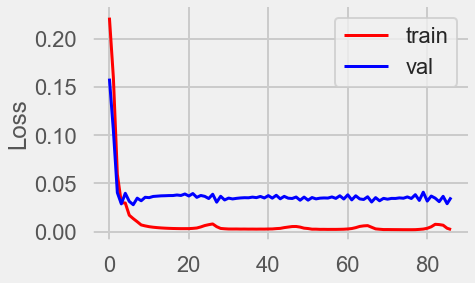

In [40]:
model,train_error,val_error =  fit_model(train,val,timesteps,lr,batch_size,num_epochs)
plot_error(train_error,val_error)

4/4 [==============================] - 0s 3ms/step
MSE = 0.03986780144322122
RMSE = 0.19966923008621337
R-Squared Score = 0.476353718984046


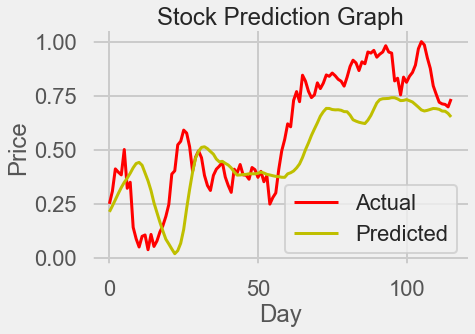

In [41]:
mse, rmse, r2_value,true,predicted = evaluate_model(model,test,timesteps)
print('MSE = {}'.format(mse))
print('RMSE = {}'.format(rmse))
print('R-Squared Score = {}'.format(r2_value))
plot_data(true,predicted)

In [42]:
#GRU - MODEL

In [43]:
def gru_model(train,val,timesteps,lr,batch,epochs):
    X_train = []
    Y_train = []
    X_val = []
    Y_val = []
    # Loop for training data
    for i in range(timesteps,train.shape[0]):
        X_train.append(train[i-timesteps:i])
        Y_train.append(train[i][0])
    X_train,Y_train = np.array(X_train),np.array(Y_train)
  
    # Loop for val data
    for i in range(timesteps,val.shape[0]):
        X_val.append(val[i-timesteps:i])
        Y_val.append(val[i][0])
    X_val,Y_val = np.array(X_val),np.array(Y_val)
    print(Y_val.shape)
    
    # Adding Layers to the model
    global gru_model
    gru_model = Sequential()

    # Layer 1 of GRU with Dropout
    gru_model.add(GRU(units=30, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2]), activation='tanh'))
    gru_model.add(Dropout(0.2))

    # Layer 2 of GRU with Dropout
    gru_model.add(GRU(units=30, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2]), activation='tanh'))
    gru_model.add(Dropout(0.2))

    # Layer 3 of GRU with Dropout
    gru_model.add(GRU(units=30, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2]), activation='tanh'))
    gru_model.add(Dropout(0.2))

    # Layer 4 of GRU with Dropout
    gru_model.add(GRU(units=30, activation='tanh'))
    gru_model.add(Dropout(0.2))

    # Output layer of GRU model
    gru_model.add(Dense(units=1))

    #compiling the model
    gru_model.compile(optimizer = optimizers.Adam(lr = 0.0008), loss = 'mean_squared_error')
    history = gru_model.fit(X_train,Y_train,epochs = 50, batch_size = 32 ,validation_data = (X_val, Y_val),verbose = 1,
                       shuffle = False, callbacks=callbacks_list)
  
    
   # model.compile(optimizer = optimizers.Adam(lr = 0.0008), loss = 'mean_squared_error', metrics= ['accuracy'])
    
   # print(model.summary())
  
    # Training the data
  #  history = model.fit(X_train,Y_train,epochs = epochs,batch_size = batch,validation_data = (X_val, Y_val),verbose = 1,
     #                   shuffle = False, callbacks=callbacks_list)
    #model.reset_states()
    return model, history.history['loss'], history.history['val_loss']

(115,)
Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 4s 89ms/step - loss: 0.1180 - val_loss: 0.0366
Epoch 2/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0476 - val_loss: 0.0506
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0322 - val_loss: 0.0344
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0163 - val_loss: 0.0345
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0146 - val_loss: 0.0354
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0137 - val_loss: 0.0334
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0119 - val_loss: 0.0315
Epoch 8/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0107 - val_loss: 0.0312
Epoch 9/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0118 - val_loss: 0.0304
Epoch 10/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0119 - val_loss: 0.0311
Epoch 11/50
8/8 [==============================]

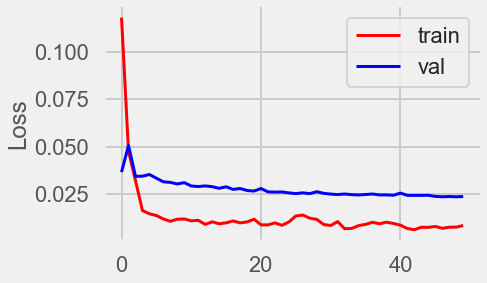

In [44]:
model,train_error,val_error =  gru_model(train,val,timesteps,lr,batch_size,num_epochs)
plot_error(train_error,val_error)

4/4 [==============================] - 1s 2ms/step
MSE = 0.02826357295783937
RMSE = 0.16811773540539787
R-Squared Score = 0.62877022730552


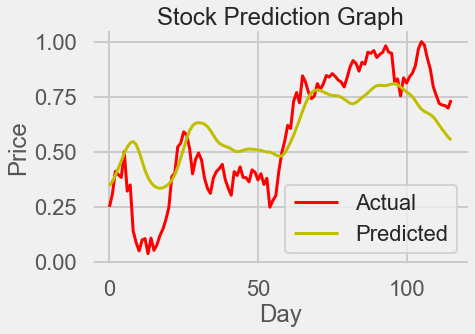

In [45]:
mse, rmse, r2_value,true,predicted = evaluate_model(gru_model,test,timesteps)
print('MSE = {}'.format(mse))
print('RMSE = {}'.format(rmse))
print('R-Squared Score = {}'.format(r2_value))
plot_data(true,predicted)